# Topic Modelling on Slovenian Job Listings

This notebook demonstrates how to perform topic modeling on Slovenian job listings using LDA (Latent Dirichlet Allocation).

## Overview

The project consists of several components:
- **DataLoader**: Loads and parses job descriptions from text files
- **DataProcess**: Preprocesses text and handles Slovenian stopwords
- **TopicModel**: Performs LDA topic modeling
- **TopicVisualise**: Creates wordcloud visualizations for topics


## 1. Setup and Imports

First, let's import all necessary modules and libraries.


In [1]:
import sys
import os

# Import project modules
from src.DataLoader import DataLoader
from src.DataProcess import DataProcess
from src.TopicModel import TopicModel
from src.TopicVisualise import TopicVisualise

# Additional libraries for analysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Set matplotlib style
plt.style.use('default')
%matplotlib inline

print("✓ All modules imported successfully!")


✓ All modules imported successfully!


## 2. Load Job Descriptions

We'll use the `DataLoader` class to load job descriptions from a text file.


In [2]:
# Initialize DataLoader with filename
filename = 'job_test.txt'
dl = DataLoader(filename=filename)

# Load job descriptions
print(f"Loading job descriptions from {filename}...")
job_descriptions = dl.load_job_descriptions(filename)

if not job_descriptions:
    print("❌ No job descriptions found!")
else:
    print(f"✓ Successfully loaded {len(job_descriptions)} job descriptions\n")
    
    # Display the first job description
    print("Example of first job description:")
    print("-" * 80)
    print(job_descriptions[0][:300] + "...")
    print("-" * 80)


Loading job descriptions from job_test.txt...
✓ Successfully loaded 1889 job descriptions

Example of first job description:
--------------------------------------------------------------------------------
MANUALNO IN AVTOMATSKO TESTIRANJE PROGRAMOV. Z ZNANJEM NEMŠČINE. TEST AUTOMATION OF WEB APPLICATIONS, PYTHON PROGRAMMING, LOAD/PERFORMANCE TESTING...
--------------------------------------------------------------------------------


## 3. Explore the Data

Let's examine the characteristics of our job descriptions dataset.


Dataset Statistics:
Total job descriptions: 1889
Average words per description: 56.4
Average characters per description: 437.8
Shortest description: 1 words
Longest description: 213 words


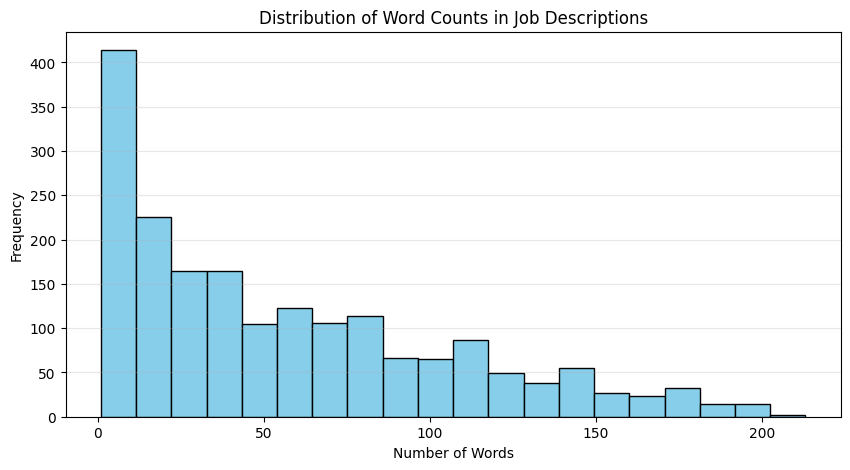

In [3]:
# Calculate basic statistics
word_counts = [len(desc.split()) for desc in job_descriptions]
char_counts = [len(desc) for desc in job_descriptions]

print("Dataset Statistics:")
print("=" * 80)
print(f"Total job descriptions: {len(job_descriptions)}")
print(f"Average words per description: {np.mean(word_counts):.1f}")
print(f"Average characters per description: {np.mean(char_counts):.1f}")
print(f"Shortest description: {min(word_counts)} words")
print(f"Longest description: {max(word_counts)} words")
print("=" * 80)

# Visualize word count distribution
plt.figure(figsize=(10, 5))
plt.hist(word_counts, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Job Descriptions')
plt.grid(axis='y', alpha=0.3)
plt.show()


## 4. Text Preprocessing

Before topic modeling, we need to preprocess the text data. The `DataProcess` class handles this with Slovenian stopwords.


In [4]:
# Initialize DataProcess
dp = DataProcess(texts=job_descriptions)

# Preprocess the texts
processed_texts, slovenian_stopwords = dp.preprocess_text()

print("Text Preprocessing Complete!")
print("=" * 80)
print(f"Number of processed texts: {len(processed_texts)}")
print(f"\nSlovenian stopwords used ({len(slovenian_stopwords)} total):")
print(slovenian_stopwords)
print("=" * 80)


Text Preprocessing Complete!
Number of processed texts: 1889

Slovenian stopwords used (28 total):
['in', 'je', 'na', 'za', 'z', 'se', 'v', 'da', 'ki', 'po', 'so', 'od', 'pri', 'ni', 'ter', 'kot', 'ali', 'ima', 'bilo', 'biti', 'tega', 'tudi', 'bo', 'več', 'če', 'vse', 'do', 'še']


## 5. Perform Topic Modeling

Now we'll use the `TopicModel` class to perform LDA topic modeling on our job descriptions.


In [ ]:
# Set parameters for topic modeling
n_topics = 5  # Number of topics to extract
n_top_words = 10  # Number of top words per topic

# Initialize TopicModel
tm = TopicModel(
    job_descriptions,
    n_topics=n_topics,
    n_top_words=n_top_words
)

# Perform topic modeling
print(f"\nPerforming topic modeling with {n_topics} topics...\n")
lda_model, vectorizer, doc_term_matrix = tm.perform_topic_modeling_lda()



Performing topic modeling with 5 topics...

Analysing 1889 job listings...

Building LDA model with 5 topics...

TOP 10 WORDS FOR EACH TOPICS

TOPIC 1:
  dela, sodelovanje, izvajanje, nalog, drugih, opravljanje, vodenje, del, priprava, področja

TOPIC 2:
  izvajanje, sodelovanje, zdravstvene, nege, okviru, delo, posegov, pacientov, postopkov, zdravstveno

TOPIC 3:
  čiščenje, prostorov, materiala, navodilih, pomoč, naprav, delo, opreme, smeti, sob

TOPIC 4:
  priprava, blaga, skrb, opravljanje, pošiljk, izdelkov, delo, vzdrževanje, dela, drugih

TOPIC 5:
  pomoč, stanovalcev, nalog, izvajanje, pripomočkov, pomoči, storitev, urejanje, vodenje, poročanje

EXAMPLE WITH JOB LISTINGS AND TOPICS:

Job 1 (Topic 1, probablity: 0.41):
  MANUALNO IN AVTOMATSKO TESTIRANJE PROGRAMOV. Z ZNANJEM NEMŠČINE. TEST AUTOMATION OF WEB APPLICATIONS, PYTHON PROGRAMMING, LOAD/PERFORMANCE TESTING...

Job 2 (Topic 3, probablity: 0.45):
  BRANJE STROJNIH NAČRTOV, PRIPRAVA GRADBIŠČA, NAPELJAVA STROJNIH INŠTALACI

## 6. Analyze Topic Distribution

Let's analyze how topics are distributed across our documents.


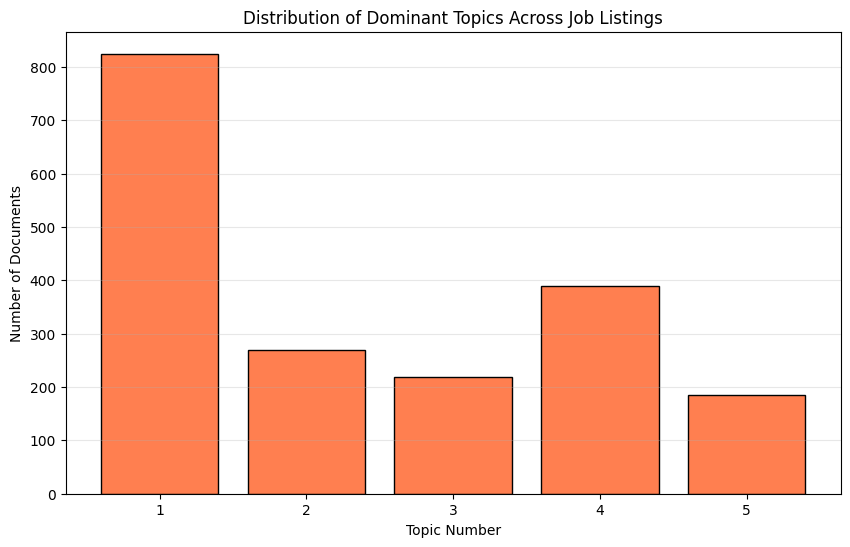


Documents per Topic:
Topic 1: 825 documents (43.7%)
Topic 2: 270 documents (14.3%)
Topic 3: 219 documents (11.6%)
Topic 4: 389 documents (20.6%)
Topic 5: 186 documents (9.8%)


In [6]:
# Get document-topic distribution
doc_topic_dist = lda_model.transform(doc_term_matrix)

# Find dominant topic for each document
dominant_topics = np.argmax(doc_topic_dist, axis=1)

# Count documents per topic
topic_counts = np.bincount(dominant_topics, minlength=n_topics)

# Visualize topic distribution
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_topics + 1), topic_counts, color='coral', edgecolor='black')
plt.xlabel('Topic Number')
plt.ylabel('Number of Documents')
plt.title('Distribution of Dominant Topics Across Job Listings')
plt.xticks(range(1, n_topics + 1))
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\nDocuments per Topic:")
print("=" * 80)
for i, count in enumerate(topic_counts):
    percentage = (count / len(job_descriptions)) * 100
    print(f"Topic {i+1}: {count} documents ({percentage:.1f}%)")
print("=" * 80)


## 7. Visualize Topics with WordClouds

Create wordcloud visualizations for each topic using the `TopicVisualise` class.


In [7]:
# Initialize TopicVisualise
tv = TopicVisualise(lda_model, vectorizer, n_topics)

# Generate and save wordcloud visualization
tv.visualize_topics_wordcloud()

print("\n✓ Wordcloud visualization complete!")



GENERATING WORDCLOUD...

✓ Wordcloud saved as: topic_wordclouds.png

✓ Wordcloud visualization complete!


## 8. Display Wordcloud Image

Let's display the generated wordcloud image in the notebook.


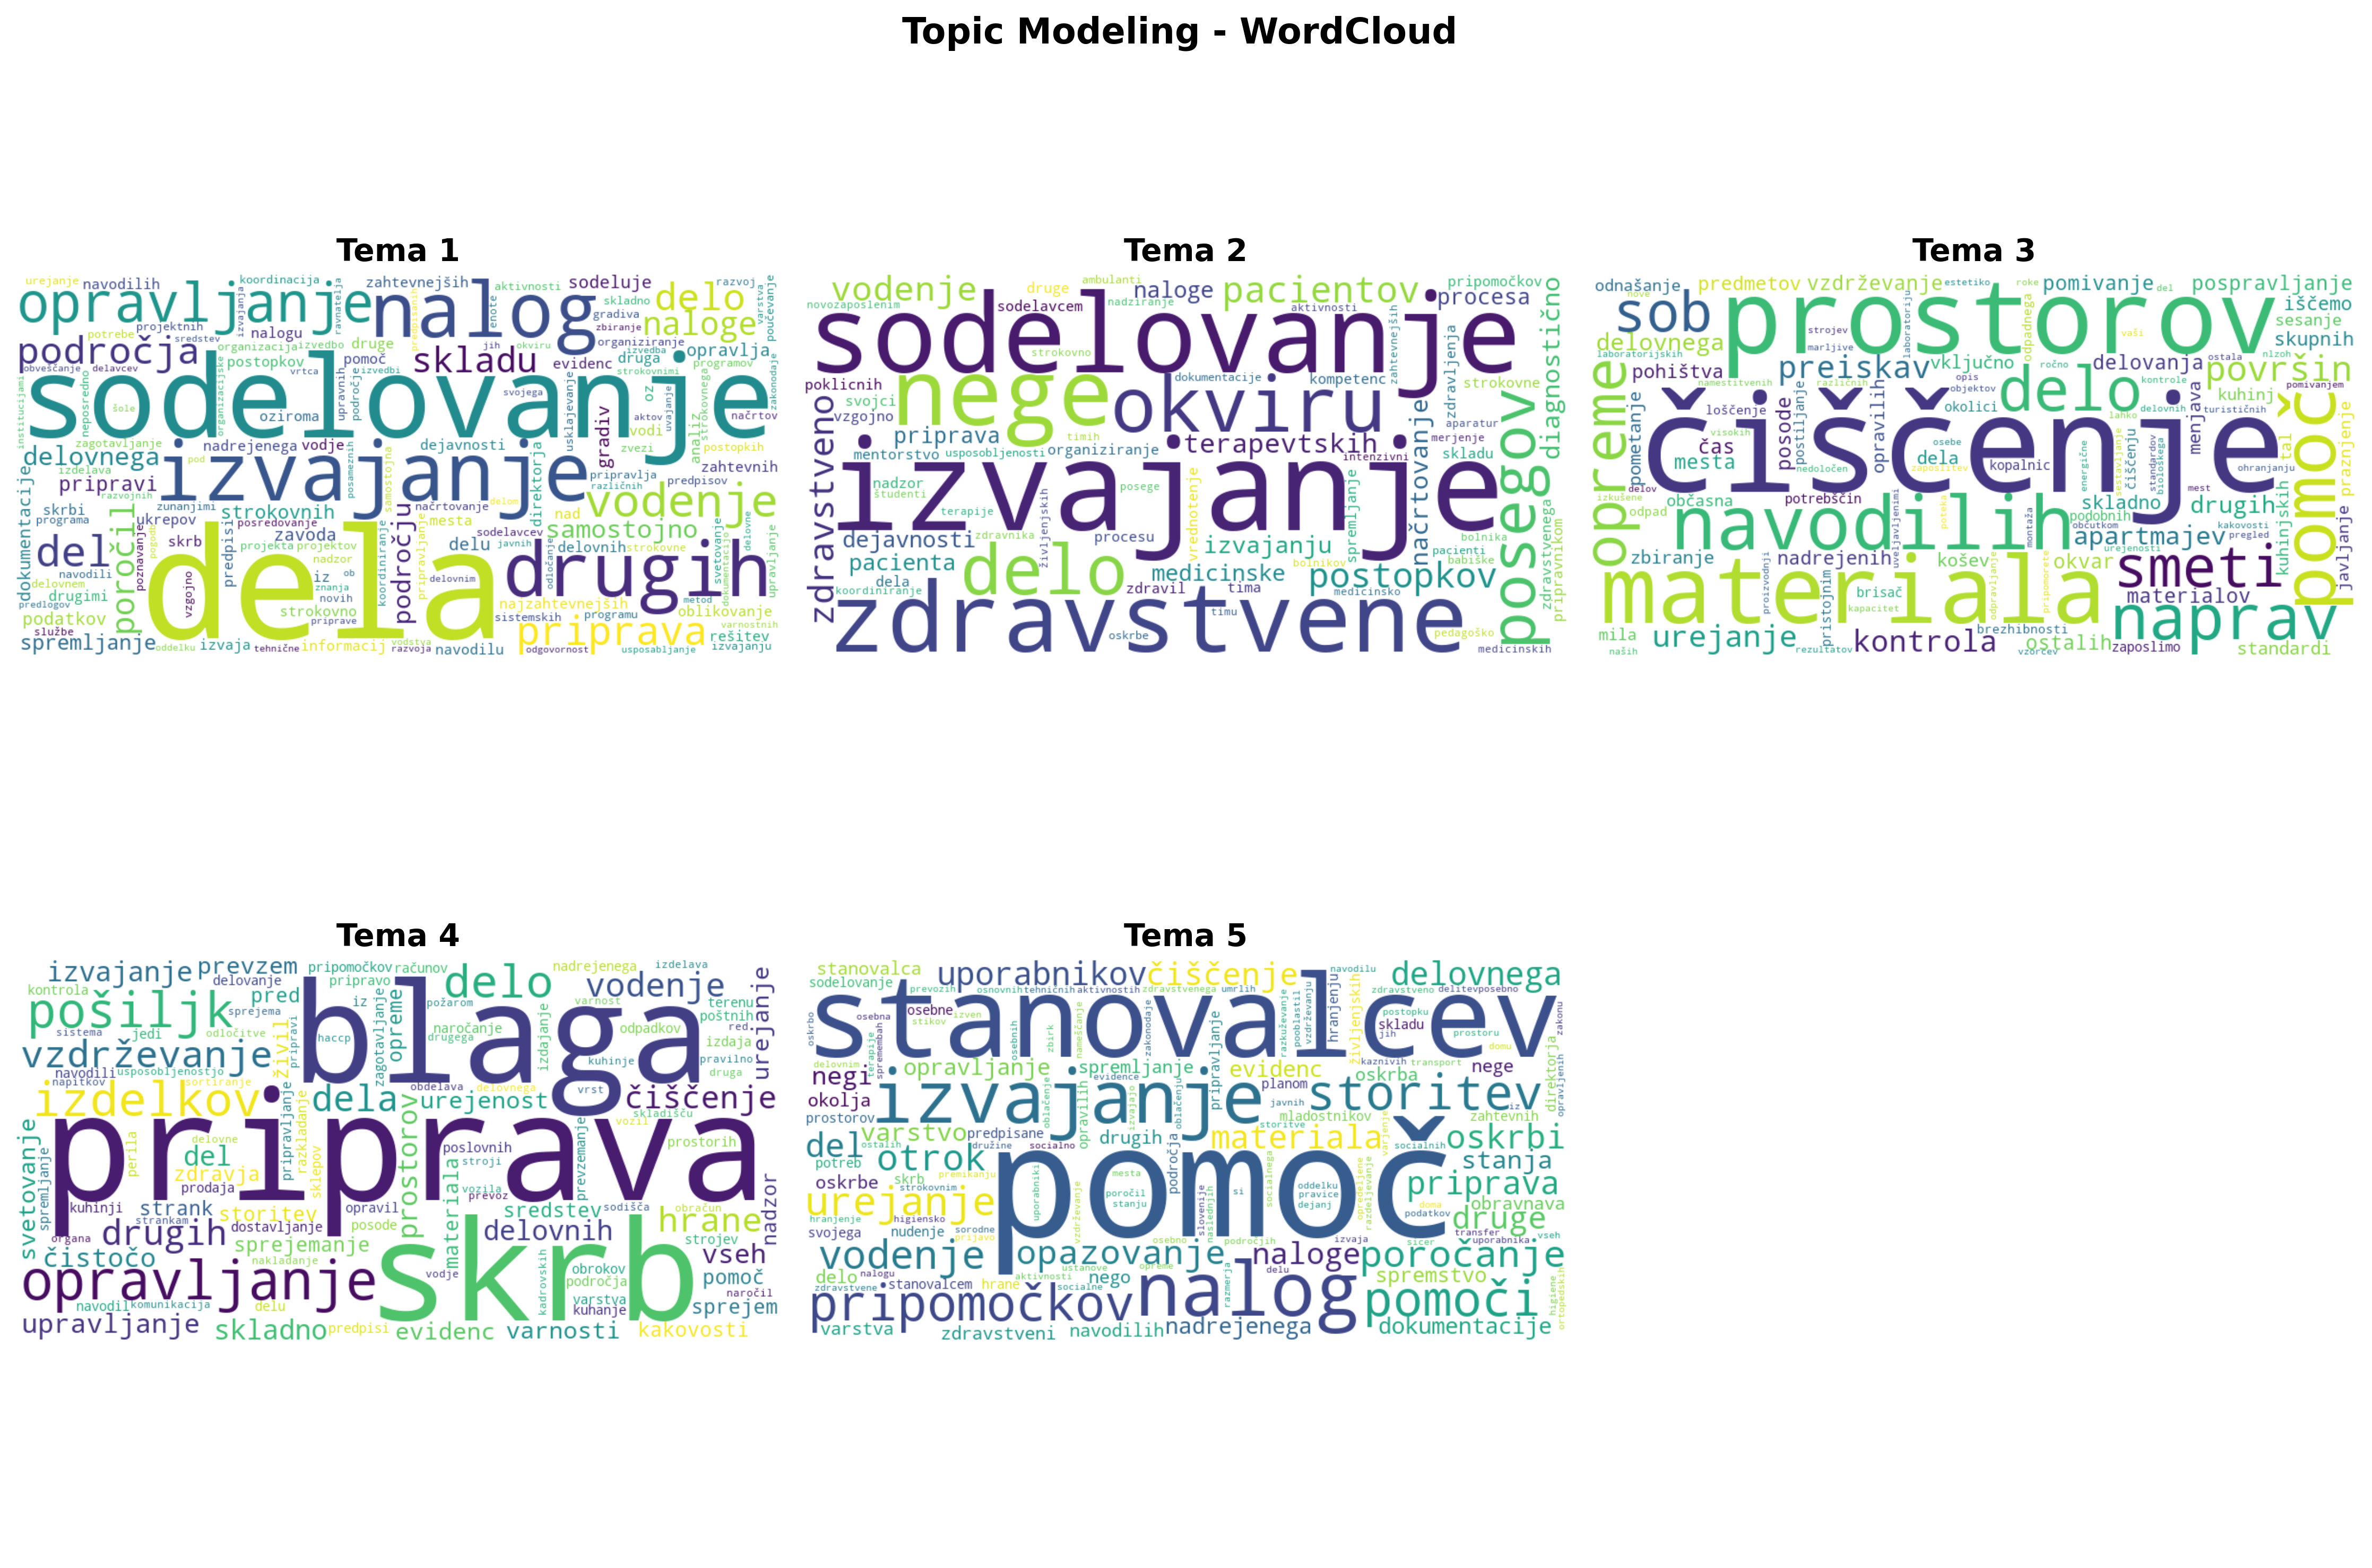

In [8]:
from IPython.display import Image, display

# Display the saved wordcloud image
display(Image(filename='topic_wordclouds.png', width=1000))


## 9. Examine Specific Job Listings

Let's examine specific job listings and their topic assignments in detail.


In [9]:
# Function to display job listing with topic probabilities
def display_job_with_topics(job_idx, job_descriptions, doc_topic_dist, n_topics):
    print(f"\nJob Listing #{job_idx + 1}:")
    print("=" * 80)
    print(job_descriptions[job_idx][:400] + "...")
    print("\n" + "-" * 80)
    print("Topic Distribution:")
    
    for topic_num in range(n_topics):
        prob = doc_topic_dist[job_idx][topic_num]
        bar = "█" * int(prob * 50)
        print(f"Topic {topic_num + 1}: {prob:.3f} {bar}")
    
    dominant_topic = np.argmax(doc_topic_dist[job_idx])
    print(f"\nDominant Topic: Topic {dominant_topic + 1}")
    print("=" * 80)

# Display first 3 job listings
for i in range(min(3, len(job_descriptions))):
    display_job_with_topics(i, job_descriptions, doc_topic_dist, n_topics)



Job Listing #1:
MANUALNO IN AVTOMATSKO TESTIRANJE PROGRAMOV. Z ZNANJEM NEMŠČINE. TEST AUTOMATION OF WEB APPLICATIONS, PYTHON PROGRAMMING, LOAD/PERFORMANCE TESTING...

--------------------------------------------------------------------------------
Topic Distribution:
Topic 1: 0.407 ████████████████████
Topic 2: 0.067 ███
Topic 3: 0.393 ███████████████████
Topic 4: 0.067 ███
Topic 5: 0.067 ███

Dominant Topic: Topic 1

Job Listing #2:
BRANJE STROJNIH NAČRTOV, PRIPRAVA GRADBIŠČA, NAPELJAVA STROJNIH INŠTALACIJ, MONTAŽA STROJNIH NAPRAV...

--------------------------------------------------------------------------------
Topic Distribution:
Topic 1: 0.429 █████████████████████
Topic 2: 0.040 ██
Topic 3: 0.448 ██████████████████████
Topic 4: 0.042 ██
Topic 5: 0.040 ██

Dominant Topic: Topic 3

Job Listing #3:
GLEJTE OBJAVO NA SPLETNI STRANI: HTTPS://ZRSVN-VARSTVONARAVE.SI/AKTUALNO/RAZPISI/ KANDIDATE OBVEŠČAMO, DA JE CELOTNO BESEDILO PROSTEGA DELOVNEGA MESTA Z VSEMI POGOJI ZA ZASEDBO DELOVNEG